# Домашнее задание
* Прочитать про методы оптимизации для нейронных сетей https://habr.com/post/318970/
* Взять код градиентного спуска для линейной регрессии (с занятия) и обучить ее
    * Методом nesterov momentum
    * Методом rmsprop

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Пример из практики

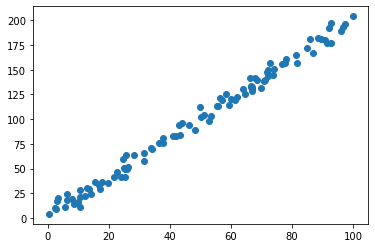

In [4]:
N = 100
X = np.random.uniform(low=0, high=100, size=N)
Y = 2*X + 1 + np.random.normal(scale=5, size=N)

plt.scatter(X, Y)
plt.show()

## Применим метод градиентного спуска

In [5]:
EPOCHS = 20
LEARNING_RATE = 0.0001

In [6]:
def cost_function(X, y, theta0, theta1):
    total_cost = 0
    for i in range(len(X)):
        total_cost += (theta0 + theta1*X[i] - y[i]) ** 2
    return total_cost / (2 * len(X))

In [7]:
def der_theta0(X, y, theta0, theta1):
    total_cost = 0
    for i in range(len(X)):
        total_cost += (theta0 + theta1*X[i] - y[i])
    return total_cost / (len(X))    

In [8]:
def der_theta1(X, y, theta0, theta1):
    total_cost = 0
    for i in range(len(X)):
        total_cost += (theta0 + theta1*X[i] - y[i]) * X[i]
    return total_cost / (len(X))  

In [9]:
theta0 = 1
theta1 = 1
for _ in range(EPOCHS):
    dt0 = der_theta0(X, Y, theta0, theta1)
    dt1 = der_theta1(X, Y, theta0, theta1)
    
    theta0 = theta0 - LEARNING_RATE * dt0
    theta1 -= LEARNING_RATE * dt1
    
    print("t0:", theta0, "t1:", theta1, "cost:", cost_function(X, Y, theta0, theta1))

t0: 1.0048665507017966 t1: 1.317003323829574 cost: 756.6873787057662
t0: 1.008201301696763 t1: 1.5337015335821538 cost: 361.3041676194548
t0: 1.010488939035027 t1: 1.6818327935443453 cost: 176.54681080597857
t0: 1.012060786242523 t1: 1.7830927982697764 cost: 90.21213430237329
t0: 1.0131433307100277 t1: 1.8523123728154256 cost: 49.86907659999734
t0: 1.0138913955459703 t1: 1.8996296287465628 cost: 31.017295027346172
t0: 1.0144108153172204 t1: 1.9319748147658053 cost: 22.208102990077393
t0: 1.0147739368178603 t1: 1.9540853365301052 cost: 18.091680426779234
t0: 1.015030215143413 t1: 1.969199607741708 cost: 16.168127069098762
t0: 1.0152134569953961 t1: 1.9795313555049203 cost: 15.26927253373885
t0: 1.0153467720868845 t1: 1.9865938477783551 cost: 14.849246226704969
t0: 1.0154459578430768 t1: 1.9914215300047726 cost: 14.652970027845779
t0: 1.0155218131277295 t1: 1.9947215323179717 cost: 14.561249300015117
t0: 1.0155817198690367 t1: 1.996977237413121 cost: 14.518385963283668
t0: 1.015630724233

#### Метод nesterov momentum

In [10]:
gamma = 0.7
theta0_nm = 1
theta1_nm = 1
L_R = 0.0007
etha = (1-gamma) * L_R
v0 = 0
v1 = 0
for _ in range(EPOCHS):
    
    v0t = gamma*v0
    v1t = gamma*v1
   
    v0 = v0t + etha*der_theta0(X, Y, theta0_nm - v0t, theta1_nm - v1t)
    v1 = v1t + etha*der_theta1(X, Y, theta0_nm - v0t, theta1_nm - v1t)

    theta0_nm -= v0
    theta1_nm -= v1
        
    print("t0:", theta0_nm, "t1:", theta1_nm, "cost:", 
          cost_function(X, Y, theta0_nm, theta1_nm))

t0: 1.0102197564737727 t1: 1.6657069800421058 cost: 193.29156256839994
t0: 1.0161094400770814 t1: 2.0454214058784577 cost: 17.484452119367326
t0: 1.0171463822870355 t1: 2.1056537155609547 cost: 31.53115029401034
t0: 1.0164445221944372 t1: 2.0508256654601644 cost: 18.276367882165868
t0: 1.0158991321503266 t1: 2.00540391166545 cost: 14.500749348547037
t0: 1.0158573379859546 t1: 1.9923713788995574 cost: 14.622758940063687
t0: 1.0160702060155244 t1: 1.9956041642456928 cost: 14.542266949858424
t0: 1.016312961807322 t1: 2.0005073500139816 cost: 14.48343469649978
t0: 1.0165149831147706 t1: 2.002543085904118 cost: 14.481362815610844
t0: 1.016688164523085 t1: 2.002550899751834 cost: 14.481342304570182
t0: 1.0168554468156252 t1: 2.002075456462989 cost: 14.480581481780318
t0: 1.0170268200683046 t1: 2.0018006500603653 cost: 14.480445249561757
t0: 1.0172023833891555 t1: 2.0017537802821703 cost: 14.480407691086784
t0: 1.0173796991612298 t1: 2.0017897960596063 cost: 14.480356095415047
t0: 1.017557250

Начиная с 5 итерации (эпохи) потери минимальны.

#### Метод rmsprop

In [11]:
theta0 = 1
theta1 = 1

LEARNING_RATE = 0.6

G0 = 0
G1 = 0
eps = 8e-7
beta = 0.9

for _ in range(EPOCHS):
    dt0 = der_theta0(X, Y, theta0, theta1)
    G0 += beta*G0 +  (1-beta)*dt0**2
    dt1 = der_theta1(X, Y, theta0, theta1)
    G1 += beta*G1 +  (1-beta)*dt1**2
    
    theta0 -= LEARNING_RATE * dt0 / np.sqrt(G0 + eps)
    theta1 -= LEARNING_RATE * dt1 / np.sqrt(G1 + eps)
    
   
    
    print("t0:", theta0, "t1:", theta1, "cost:", 
          cost_function(X, Y, theta0, theta1))

t0: 2.897366592896465 t1: 2.897366596100272 cost: 1365.6264594872218
t0: 1.8422076119999782 t1: 1.8422159119524792 cost: 48.54506758181392
t0: 1.9637128530055439 t1: 1.9637253872738771 cost: 15.241857846208923
t0: 1.9778889811817297 t1: 1.9779047277692776 cost: 14.492675481395956
t0: 1.981911224015566 t1: 1.9819293067473054 cost: 14.399488420585897
t0: 1.9835397989355787 t1: 1.9835595752675672 cost: 14.376771868832488
t0: 1.98434235375207 t1: 1.9843633574833515 cost: 14.368761747866742
t0: 1.9847890487420108 t1: 1.9848109421222542 cost: 14.365214548142687
t0: 1.9850583606145173 t1: 1.9850808989585595 cost: 14.363390916269063
t0: 1.9852297814347828 t1: 1.9852527874350685 cost: 14.362353593625675
t0: 1.9853430760852535 t1: 1.9853664212244733 cost: 14.36172072998235
t0: 1.985419960860594 t1: 1.9854435519651799 cost: 14.361315153912972
t0: 1.9854731252363684 t1: 1.985496894744791 cost: 14.361046009562461
t0: 1.9855103833555792 t1: 1.9855342822715158 cost: 14.360862899216752
t0: 1.985536746

Начиная с 3 - 4 итераций потери минимальны.

### Другой подход

In [13]:
# h(xi) = params[0] + params[1] * xi

EPOCHS = 12
LEARNING_RATE = 0.0001

costs = []
params = []
preds = []
params = np.random.normal(size=(2,))

for _ in range(EPOCHS):
    predictions = params[0] + params[1] * X
    preds.append(predictions)

    cost = np.sum(np.square(predictions - Y)) / (2 * len(predictions))
    costs.append(cost)
    
    params[0] -= LEARNING_RATE * np.sum(predictions - Y) / len(predictions)
    params[1] -= LEARNING_RATE * np.sum((predictions - Y) * X) / len(predictions)    

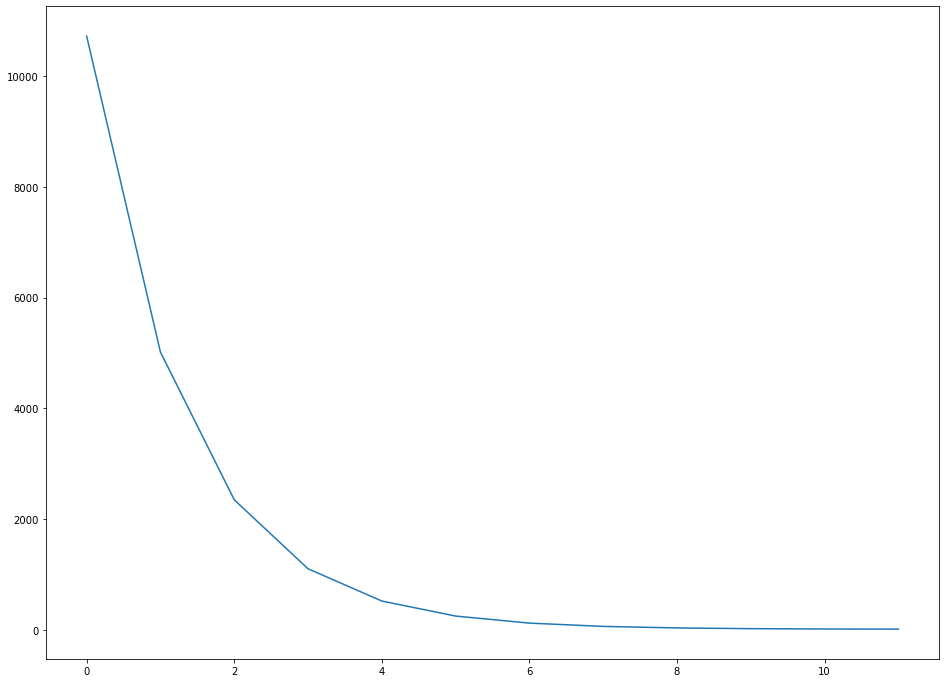

In [14]:
plt.figure(figsize=(16,12))
plt.plot(costs)
plt.show()

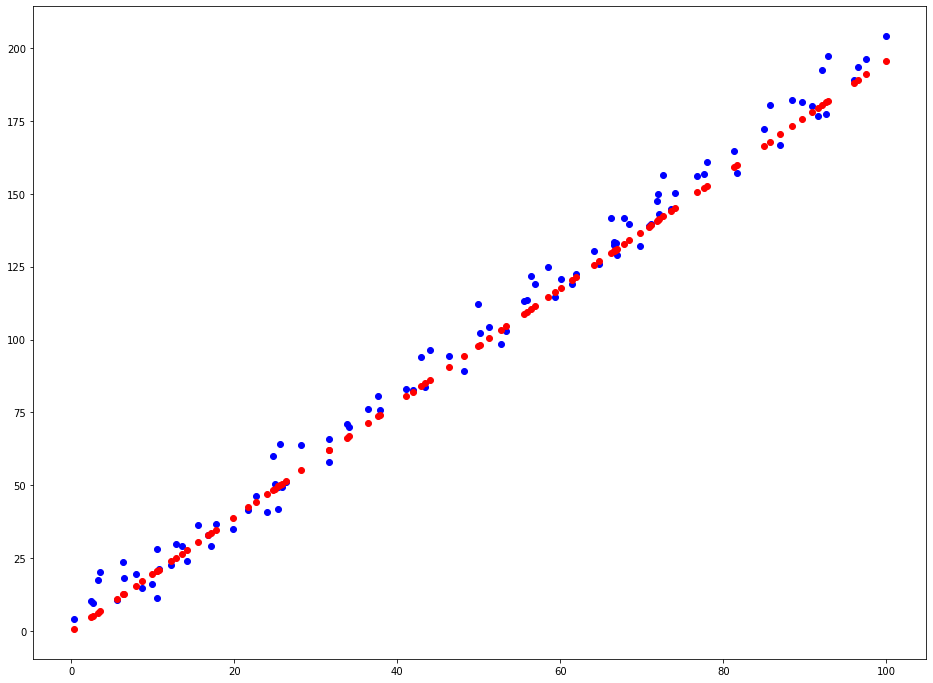

In [15]:
plt.figure(figsize=(16,12))
plt.scatter(X, Y, color='blue')
plt.scatter(X, preds[10], color='red')
plt.show()

In [16]:
params

array([0.00980277, 1.99012733])

#### Метод Nesterov momentum

In [17]:
EPOCHS = 12
#LEARNING_RATE = 0.0001

costs = []
params = []
preds = []
params = np.random.normal(size=(2,))

gamma = 0.7
L_R = 0.0007
etha = (1-gamma)*L_R
v = np.zeros((2,))

for _ in range(EPOCHS):
        
    predictions = params[0] + params[1] * X
    preds.append(predictions)

    cost = np.sum(np.square(predictions - Y)) / (2 * len(predictions))
    costs.append(cost)
    
    v_t = gamma*v
    
    v[0] = v_t[0] + etha*np.sum((params[0]-v_t[0]) + (params[1]-v_t[1]) * X - Y) / len(predictions)
    v[1] = v_t[1] + etha*np.sum(((params[0]-v_t[0]) + (params[1]-v_t[1]) * X - Y) * X) / len(predictions)

    
    params[0] -= v[0]
    params[1] -= v[1]


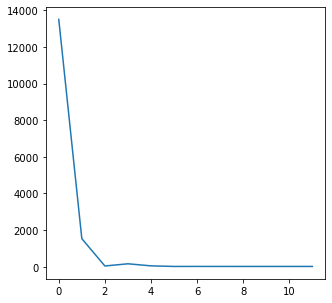

In [18]:
plt.figure(figsize=(5,5))
plt.plot(costs)
plt.show()

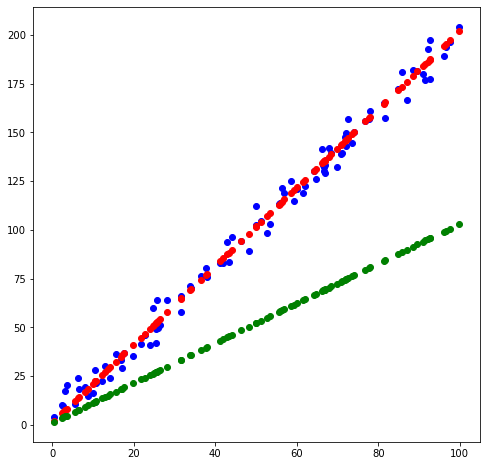

In [19]:
plt.figure(figsize=(8,8))
plt.scatter(X, Y, color='blue')
plt.scatter(X, preds[5], color='red')
plt.scatter(X, preds[1], color='green')
plt.show()

In [20]:
params

array([1.12231014, 2.00013596])

#### Метод rmsprop

In [25]:
# h(xi) = params[0] + params[1] * xi

EPOCHS = 14
LEARNING_RATE = 0.3

costs = []
params = []
preds = []

params = np.random.normal(size=(2,))

G0 = 0
G1 = 0

eps = 8e-7
beta = 0.9

for _ in range(EPOCHS):
    predictions = params[0] + params[1] * X
    preds.append(predictions)

    cost = np.sum(np.square(predictions - Y)) / (2 * len(predictions))
    costs.append(cost)
    
    G0 = beta*G0 + (1-beta)*(np.sum(predictions - Y) / len(predictions))**2
    G1 = beta*G1 + (1-beta)*(np.sum((predictions - Y) * X) / len(predictions))**2
    
    params[0] -= LEARNING_RATE * np.sum(predictions - Y) / len(predictions) / np.sqrt(G0+eps)
    params[1] -= LEARNING_RATE * np.sum((predictions - Y) * X) / len(predictions) / np.sqrt(G1+eps)

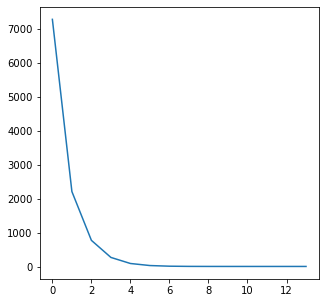

In [26]:
plt.figure(figsize=(5,5))
plt.plot(costs)
plt.show()

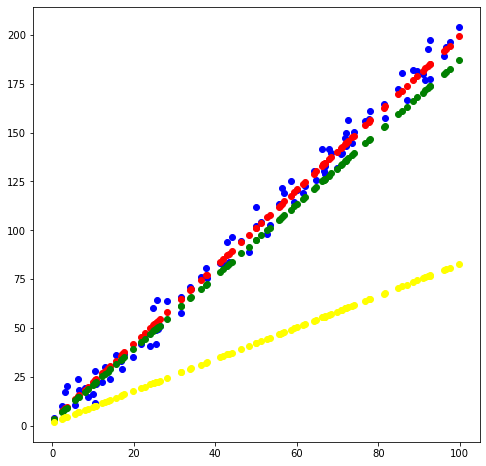

In [31]:
plt.figure(figsize=(8,8))
plt.scatter(X, Y, color='blue')
plt.scatter(X, preds[9], color='red')
plt.scatter(X, preds[5], color='green')
plt.scatter(X, preds[1], color='yellow')
plt.show()

In [30]:
params

array([2.8375757, 1.973921 ])